
# Lab Assignment 11:

# Write a python program to implement LDA as classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#let's start by importing data set using numpy
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [3]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.471000,3.094000,2.862000,0.785000
std,29.011492,0.641698,0.476057,1.448565,0.566288
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,25.750000,5.000000,2.800000,1.500000,0.200000
50%,50.500000,5.400000,3.050000,2.450000,0.800000
75%,75.250000,5.900000,3.400000,4.325000,1.300000
max,100.000000,7.000000,4.400000,5.100000,1.800000


In [4]:
#loading features and converting to a matrix X
newdata = data.values
x1 = newdata[:, 1]
n = len(x1)
x2 = newdata[:, 2]

In [5]:
Y = newdata[:, 4]

<IPython.core.display.Javascript object>


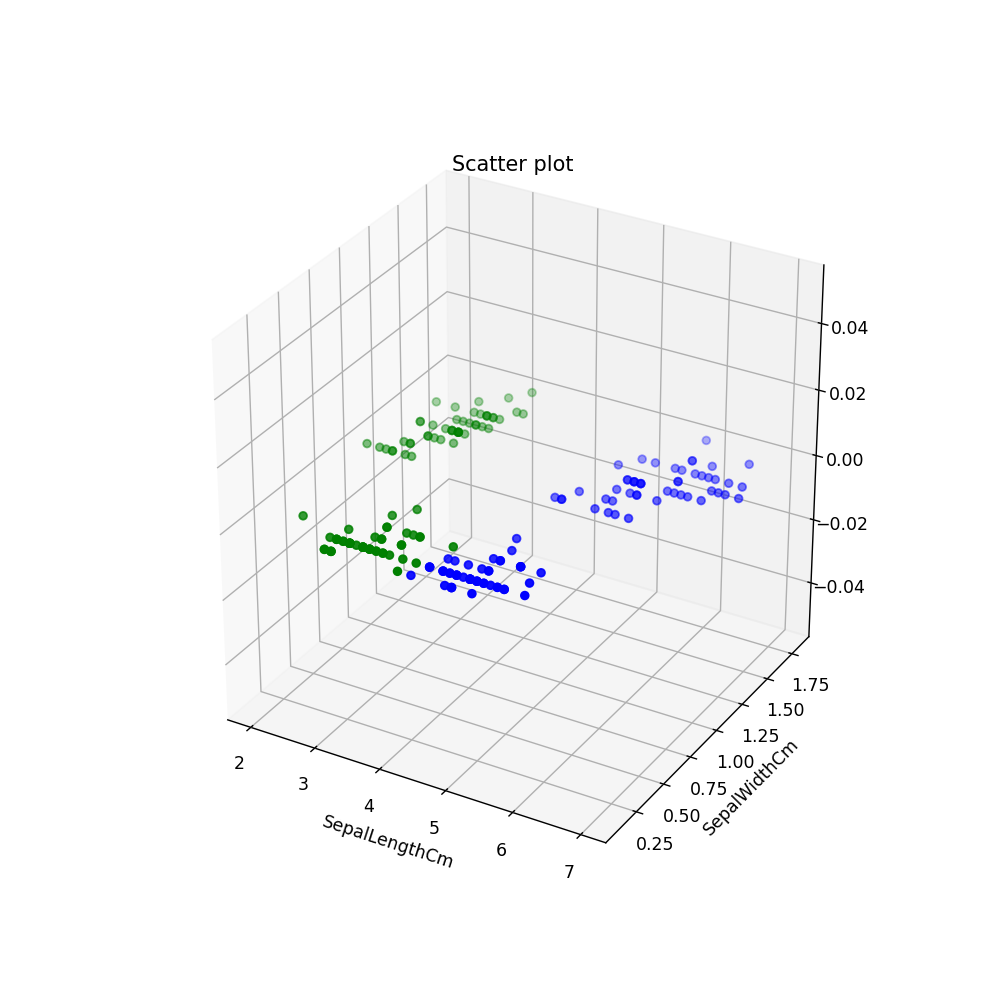

In [6]:
# our scatter plot in 3d to visualise raw data and evaluate based on guassion distribution and remove outliers
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, Y, color='blue')
ax.scatter(x2, Y, color='green')
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
plt.title('Scatter plot')
plt.show()

we can see any outlier in above raw data visualisation

In [7]:
#standarizing or normalizing data on scale of mean = 0 and varience =1
n = len(x1)
x1_norm = np.array([])
x2_norm = np.array([])

xtemp1 = 0
xtemp2 = 0

for i in range(n):
    xtemp1 = (x1[i]-np.mean(x1))/np.std(x1)
    xtemp2 = (x2[i]-np.mean(x2))/np.std(x2)
    x1_norm = np.append(x1_norm, xtemp1)
    x2_norm = np.append(x2_norm, xtemp2)
    xtemp1 = 0
    xtemp2 = 0

x1_norm = x1_norm.reshape(n, 1)
x2_norm = x2_norm.reshape(n, 1)

 calculating number of class for data which is 
 1. class-1 - Iris-setosa
 2. class-2 -Iris-virginica

In [8]:
# covarience of our p dimensional data is equal to covarience of each class so
X = np.hstack((x1_norm, x2_norm))
cov_matrix = (X.T).dot(X)/n
print(cov_matrix)

[[ 1.         -0.19764563]
 [-0.19764563  1.        ]]


We can see no linear dependence of our dimensions

In [9]:
# now we will make matrix for this class to calculate linear classifier
F1 = np.hstack((x1_norm[:50], x2_norm[:50]))
print(F1.shape)

(50, 2)


In [10]:
F2 = np.hstack((x1_norm[50:], x2_norm[50:]))
print(F2.shape)

(50, 2)


Finding attributes of maximum a posterior function to find linear classifier

In [11]:
#lets calculate pi(k) for each class
pi_1 = F1.shape[0]/len(x1)
pi_2 = F2.shape[0]/len(x1)

In [12]:
# mean vector of F1 , F2 and F3 classes
F1_mean = np.mean(F1, axis = 0)
F2_mean = np.mean(F2, axis = 0)
print("----------------------Mean Vector of F1 class--------------------")
print(F1_mean)
print()
print("----------------------Mean Vector of F2 class--------------------")
print(F2_mean)
print()

----------------------Mean Vector of F1 class--------------------
[-0.72829015  0.68401941]

----------------------Mean Vector of F2 class--------------------
[ 0.72829015 -0.68401941]



In [13]:
# lets calculate covarience matrix of classes
size = F1.shape[0]
cov_F1 = (F1.T).dot(F1)/size
cov_F2 = (F2.T).dot(F2)/size
cov = (size*cov_F1 + size*cov_F2)/n

delta(x) = x.T*cov_matrix*mu_k - (1/2)mu_k.T*cov_matrix^-1*mu_k + log(pi_k)

g_pred(X) = arg max (delta(x))

In [14]:
# lets find decision boundary between classes 
# w0 =log(pi_k/pi_l)- (1/2)*(mu_k-mu_l)*cov_matrix*(mu_k+mu_l).T
#w = cov_matrix^-1*(mu_k-mu_l)
# 1st between class1 and class2
w0 = np.log10(pi_1/pi_2)- (1/2)*(F1_mean - F2_mean).dot(cov_matrix).dot(F1_mean + F2_mean)
w1 = (np.linalg.inv(cov_matrix)).dot(F1_mean - F2_mean)
print("For linear saperable b/w class 1 and 2 :\nw0  : ", w0,"\nw1 :" , w1)

For linear saperable b/w class 1 and 2 :
w0  :  -6.4663974072208004e-15 
w1 : [-1.23441431  1.12406222]


In [15]:
x1 = x1.reshape(n, 1)
x2 = x2.reshape(n, 1)
Y = Y.reshape(n, 1)

<IPython.core.display.Javascript object>


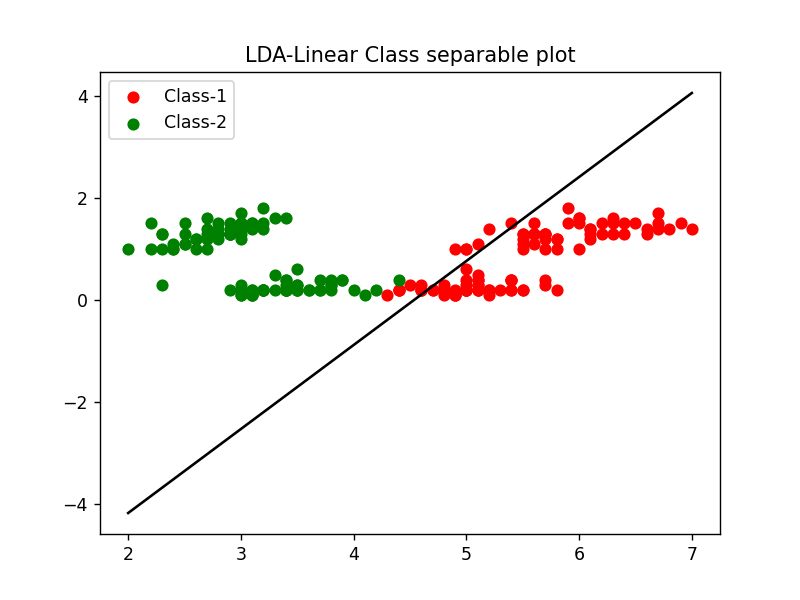

In [22]:
%matplotlib notebook
X_plot = np.hstack((x1, x2))
X_plot_min = np.min(X_plot)
X_plot_max = np.max(X_plot)
Y_saparable = w0 + w1[0]*F1  + w1[1]*F2
min_Y_saparable = np.min(Y_saparable)
max_Y_saparable  = np.max(Y_saparable)
plt.scatter(x1, Y, color = 'r',label = "Class-1")
plt.scatter(x2, Y, color = 'g',label = "Class-2")
plt.plot([X_plot_min, X_plot_max], [min_Y_saparable, max_Y_saparable], color = 'black')
plt.title('LDA-Linear Class separable plot')
plt.legend()
plt.show()

In [38]:
# calculating number of data points after prediction for class 1 and 2

Y_saparable = w0 + w1[0]*x1_norm  + w1[1]*x2_norm
count_1 = 0
count_2 = 0
for i in range(X.shape[0]):
    if(Y_saparable[i]>0):
        count_1 += 1
    else:
        count_2 += 1
        
print("data points in class 1: ", count_1, "\ndata points in class 2: ", count_2)
confusion_matrix = np.array([49, 1, 1,50]).reshape(2, 2) 
print("-----------------The confusion matrix for data set-------------------")
print(confusion_matrix)

data points in class 1:  49 
data points in class 2:  51
-----------------The confusion matrix for data set-------------------
[[49  1]
 [ 1 50]]


In [39]:
population = X.shape[0]
true_positive = 49
true_neg = 50
accurancy = ((true_positive+true_neg)/population)*100
print("Accuracy :", accurancy)

Accuracy : 99.0


In [42]:
precision = true_positive/(true_neg+1)
print("precision : ", precision)

precision :  0.9607843137254902
